# ELABORAR RELATÓRIO ANALÍTICO DE DATA SCIENCE
**Integrantes:**
* ALEXANDRE FERNANDES DE OLIVEIRA BESSA
* LUAN DOS SANTOS BARBOSA
* LUIS VITOR GOMES ALVES DA SILVA
* PEDRO HENRIQUE TEBERGES CAVALCANTI
* RYANDRO DA SILVA TAVARES

**Informação do DataFrame**
* Nome do DataFrame: "1000 Most Trending YouTube Videos"
* Link do DataFrame: https://www.kaggle.com/datasets/samithsachidanandan/1000-most-trending-youtube-videos

**Origem e justificativa:**
* Analisamos um dataset com 1000 vídeos mais populares do YouTube, com os objetivos de entender o que torna um vídeo bem-sucedido. A escolha foi baseada na relevância da plataforma e no valor estratégico de identificar padrões de consumo e engajamento. Além de ser dados com um fácil manuseio.

* O YouTube é uma das principais plataformas para consumo de conteúdo audiovisual. Com bilhões de visualizações diárias, compreender os fatores que tornam um vídeo popular é fundamental para criadores e profissionais de dados.

# 1. O começo (Fase 1)
**Limpeza e Preparação:**
* Foi realizado o tratamento dos dados ausentes, conversão de datas e tipos numéricos, criação de métricas e padronização das categorias.

**Análise exploratória:**
* Respondemos também perguntas com base em estatísticas e gráficos. Ano com mais vídeos, categoria com mais visualizações, vídeos mais curtidos, mais *dislikes* e um maior engajamento proporcional.

## 1.1. Importação do Dataset e biblioteca

No código a seguir importamos as bibliotecas Pandas, Numpy e Seaborn

In [1918]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker

Apenas uma medida para formatação do código não ficar em notação científica. (Alguns códigos)

In [1919]:
pd.set_option('display.float_format', '{:,.0f}'.format)

Logo a seguir salvamos o nosso DataFrame, usando a biblioteca pandas e o comando pd.read_csv para ler o arquivo e salvar no df

In [1920]:
df = pd.read_csv('top-1000-trending-youtube-videos.csv')

## 1.2. Análise Estrutural do Dataset

Exibição das informações gerais do DataFrame

In [1921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


Exibição das 10 primeiras linhas do DataFrame

In [1922]:
df.head(10)

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021
5,6,JP Saxe - If the World Was Ending (Official Vi...,"76,834,495","804,353","21,195",Music,2019
6,7,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
7,8,Power Star Pawan Kalyan Special Surprise To Se...,"96,686","1,007",82,Entertainment,2018
8,9,Kulit Kamu Kulit Kering dan Sensitif? Pakai Av...,"9,605,969",6,NaN,NaN,2023
9,10,Totti with a funny penalty,"8,353,318","5,613","1,082",Sports,2007


Exibição das 10 últimas linhas do DataFrame

In [1923]:
df.tail(10)

,rank,Video,Video views,Likes,Dislikes,Category,published
990,991,ITS Coop Travel - Traumhafte Ferien (kurz),"1,263,044",2,5,Travel & Events,2017
991,992,It Got Grandma!: Chimp at Zoo Throws Poo in Gr...,"3,975,037","24,800","1,387",Pets & Animals,2017
992,993,2017 0401 s10 Toruń Bydgoszcz,"1,273,971","3,076",454,Entertainment,2017
993,994,Eagles Fan Gets Wrecked by Pole,"706,418",877,40,Film & Animation,2018
994,995,UltraTap - новости из соцсетей,"498,038",706,"1,533",People & Blogs,2017
995,996,CALIFORNIA - MONDAY JUSTICE FEAT. SNOOP DOGG (...,"943,248","2,949",22,Music,2017
996,997,John McEnroe's most famous outburst happened i...,"4,853,621","7,254",426,Sports,2010
997,998,Adi Golan's Group - Teaser,"56,578",NaN,NaN,Music,2014
998,999,Keg tapping goes horribly wrong.,"751,804","3,427",313,Entertainment,2017
999,1000,LIVE Hurricane Irma - Downtown Orlando - Ameri...,"554,438",184,8,News & Politics,2016


Alteração do nome das colunas para nomes sugestivos e em português

In [1924]:
df_auxiliar = df.rename(columns={'rank': 'Rank', 'Video': 'Vídeo', 'Video views': 'Visualizações', 'Likes': 'Curtidas', 'Dislikes': 'Desgostos', 'Category': 'Categoria', 'published': 'Publicado'})
df_auxiliar

,Rank,Vídeo,Visualizações,Curtidas,Desgostos,Categoria,Publicado
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021
...,...,...,...,...,...,...,...
995,996,CALIFORNIA - MONDAY JUSTICE FEAT. SNOOP DOGG (...,"943,248","2,949",22,Music,2017
996,997,John McEnroe's most famous outburst happened i...,"4,853,621","7,254",426,Sports,2010
997,998,Adi Golan's Group - Teaser,"56,578",NaN,NaN,Music,2014
998,999,Keg tapping goes horribly wrong.,"751,804","3,427",313,Entertainment,2017


Agora iremos fazer a verificação de valores ausentes ou nulos, valores duplicados e tipos inconsistentes.
* Utilizamos o df.info() para uma visualização geral de todos os dados (apensar de fazer cada código separado logo a seguir também). 

In [1925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


Verificamos se o dataframe possui valores ausentes ou nulos

In [1926]:
df.isnull().sum()

rank             0
Video            0
Video views      0
Likes           27
Dislikes       313
Category       180
published        0
dtype: int64

Verificamos se o dataframe possui valores duplicados.
* Sobre os valores duplicados percebemos que o mesmo não possui nenhum valor duplicado logo não é necessario fazer o tratamento do mesmo

In [1927]:
df[df.duplicated()]

,rank,Video,Video views,Likes,Dislikes,Category,published


Verificamos se possui valores inconsistente
* Colunas como 'Video views', 'Likes' e 'Dislikes' estão sendo tratados como Object apesar de serem apenas "Número".

In [1928]:
df.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object

## 1.3. Verificação e Tratamento de Dados

Nos códigos a seguir, tratamos 4 colunas que foi anteriomente analisada.
* Primeiro removemos as ',' das strings (Object). **Código: str.replace(',', '')**
* Depois preenchemos os valores ausentes ou nulos por 0. **Código: fillna(0)**
* E finalizamos convertendo o tipo da coluna para inteiro. **Código: astype(int)**

In [1929]:
df['Video views'] = df['Video views'].str.replace(',', '').fillna(0).astype(int)
df['Likes'] = df['Likes'].str.replace(',', '').fillna(0).astype(int)
df['Dislikes'] = df['Dislikes'].str.replace(',', '').fillna(0).astype(int)

Seguindo a mesma lógia do anterior, porém tratamos somente os valores nulos, na coluna 'Category', os valores nulos agora serão 'Sem categoria'.

In [1930]:
df['Category'] = df['Category'].fillna('Sem categoria')

O código a seguir remove um registro considerando valores duplicados da coluna em questão
* Porém anteriomente foi analisado que a tabela em questão não possui valores duplicados, o que arrecada de não precisar a execução do código a seguir.

In [1931]:
duplicados = df[df.duplicated(subset=['Video'], keep=False)]
duplicados

,rank,Video,Video views,Likes,Dislikes,Category,published
49,50,Aydem Enerji - Hayat için enerji,3102751,8,0,Sem categoria,2020
115,116,Aydem Enerji - Hayat için enerji,2003221,5,1,Sem categoria,2020
257,258,Helping small businesses find a way,1949456,0,0,Sem categoria,2021
301,302,Tiryakinim,8170818,45890,0,Music,2024
307,308,UWAIE,8114376,122955,0,Music,2024
310,311,Helping small businesses find a way,1688453,2,0,Sem categoria,2021
440,441,UWAIE,6903203,45620,0,Music,2025
530,531,Tiryakinim,6332540,64248,0,Music,2024
532,533,Bıraktığın Gibi Burdayım,1291926,10366,0,Music,2024
535,536,Bıraktığın Gibi Burdayım,1889571,13340,0,Music,2024


In [1932]:
df = df.drop_duplicates(subset=['Video']) # Remoção de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         994 non-null    int64 
 1   Video        994 non-null    object
 2   Video views  994 non-null    int64 
 3   Likes        994 non-null    int64 
 4   Dislikes     994 non-null    int64 
 5   Category     994 non-null    object
 6   published    994 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 62.1+ KB


## 1.4. Manipulação de DataFrame

No código a seguir criamos duas amostras com 100 registros cada e logo a seguir é impresso na tela a 'amostra1' e 'amostra2'

In [1933]:
amostra1 = df.sample(100)
amostra2 = df.sample(100)

In [1934]:
print(amostra1)

     rank                                              Video  Video views  \
914   915  J.P., NLE Choppa - Bad Bitty (Remix) [Official...       987265   
524   525                            Heaven - DJ Sammy Remix     11370933   
427   428  Aslay feat. Harmonize - Follow Me (Official Mu...      1397658   
104   105  Brock Lesnar serves breakfast in ESPN cafeteri...      2472045   
865   866      The Smokey Life - With Lyrics (Leonard Cohen)      1701700   
..    ...                                                ...          ...   
870   871  Leverage: Redemption - Official Trailer | IMDb...      9056254   
215   216                        Your Wyndham Is Waiting :30     12559128   
8       9  Kulit Kamu Kulit Kering dan Sensitif? Pakai Av...      9605969   
777   778            COREOGRAFIAS RAUL CHARLO, BAILE MODERNO      2602204   
684   685                                      Rocky Balmoto      2218572   

     Likes  Dislikes        Category  published  
914  46378         0     

In [1935]:
print(amostra2)

     rank                                              Video  Video views  \
329   330                   Color changing Lightning McQueen      7005951   
966   967               Parfym.se - Ad Q3-4 2019 - 15sec (B)      2371993   
297   298                          Amarah Bagaikan Korek Api     15504921   
467   468               Of Monsters And Men - Love Love Love      3474904   
656   657  UMI, V - wherever u r (ft. V of BTS) official ...      4273176   
..    ...                                                ...          ...   
729   730           Coldplay covers Linkin Park's "Crawling"      1034276   
898   899  Collect More Verified Customer Ratings and Rev...       702178   
896   897               Shop Groceries Online with Fast Lane       769638   
23     24                      Jim Carrey THE FUNNIEST video      8322488   
285   286       HELLS ANGELS BEAT & STAB BANDIDOS BIKER GANG      2659150   

      Likes  Dislikes         Category  published  
329     803       907  

Agora iremos criar um Dataframe auxiliar, remove uma coluna caso todos os valores sejá nulos e tratar os que são pacialmente nulos.
* Será realizado uma cópia do origial para um auxiliar.
* Como todos os valores já foram tratados anteriomente o DataFrame auxiliar não ira precisar de tratamento.
* Apesar de tudo isso segue o código de como tratar sobre o problema caso o mesmo exista.

Cópia do DataFrame

In [1936]:
df_auxiliar = df.copy()

A seguir removemos uma coluna inteira caso todos os valores do mesmo sejá nulos
* Utilizando o comando 'dropna' para remover a coluna
* Continuando com o comando 'axis=1' para identificar que será tratado somente sobre colunas. (axis=0 é sobre linhas)
* Finalizando com o comando 'how='all' onde indentifica se todos os valores são nulos.

In [1937]:
df_auxiliar = df_auxiliar.dropna(axis=1, how='all')

Agora iremos tratar apenas os valos que são nulos pacialmente


In [1938]:
for coluna in df_auxiliar.columns:
    if df_auxiliar[coluna].isnull().any(): # Aqui será indentificado se existe pelomenos algum valor nulo

        if df_auxiliar[coluna].dtype == 'object': # Se o tipo da coluna for object, ira remove os valos nulos por string vazias
            df_auxiliar[coluna] = df_auxiliar[coluna].fillna('')

        else: # Se não, ira remover os valores nulos e colocar um 0 no lugar.
            df_auxiliar[coluna] = df_auxiliar[coluna].fiina(0)

Utilizamos a coluna 'Category' como base para criar um agrupamento.
* Usando o comando **'unique()'** agrupamos a coluna.
* Depois é impresso na tela as 10 categorias com mais vídeos para demonstrar a funcionalidade melhor.

In [1939]:
categoria = df['Category'].unique().tolist()

categoria

['Sem categoria',
 'Music',
 'Entertainment',
 'Sports',
 'Comedy',
 'People & Blogs',
 'Gaming',
 'Pets & Animals',
 'Autos & Vehicles',
 'Education',
 'Film & Animation',
 'News & Politics',
 'Howto & Style',
 'Travel & Events',
 'Nonprofits & Activism',
 'Science & Technology']

In [1940]:
df['Category'].value_counts().head(10)

Category
Music               281
Sem categoria       178
People & Blogs      171
Entertainment        96
Comedy               63
Sports               44
Autos & Vehicles     36
Film & Animation     29
Pets & Animals       19
Gaming               17
Name: count, dtype: int64

Quantidade de vídeos lançados após o ano de 2020
* Criamos uma variável chamada 'df_filtro' e logo a seguir é realizado se na coluna 'published' possui valores maiores de 2020.

In [1941]:
df_filtro = df[df['published'] > 2020]

df_filtro

,rank,Video,Video views,Likes,Dislikes,Category,published
2,3,JoJo Siwa - Karma (Official Video),34206747,293563,0,Music,2024
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,236085971,38,0,Sem categoria,2021
6,7,David Kushner - Daylight (Official Music Video),18558390,680732,0,Music,2023
8,9,Kulit Kamu Kulit Kering dan Sensitif? Pakai Av...,9605969,6,0,Sem categoria,2023
10,11,Babilala ที่ทั้งแม่และลูกชื่นชอบนั้นคืออะไร?,8718326,46,0,Sem categoria,2021
...,...,...,...,...,...,...,...
918,919,What happened with petrol ⛽️ theif?,86474636,770294,0,People & Blogs,2025
919,920,Nanpa Básico - Cuando Vienes (Official Video),686747,24507,0,Music,2024
920,921,走れSAKAMOTO / Vaundy：MUSIC VIDEO,2945781,25949,0,Music,2025
921,922,Whiplash,26339205,125508,0,Music,2024


## 1.5. Elaboração de perguntas iniciais e interpretações

Pergunta 1: Qual o ano que teve mais lançamentos de vídeos?
* De acordo com o código o ano 2017 foi o que teve mais vídeos lançados

In [1942]:
df['published'].value_counts().head(5)

published
2017    131
2024     88
2007     84
2023     63
2019     59
Name: count, dtype: int64

Pergunta 2: Qual a categoria que teve mais visualizações?

* Primeiro foi criado uma variável para juntar as colunas Category e Video views.
* Depois foi ordenado do maior para o menor com base nas visualizações e impresso os 3 maiores para medida de comparação.

In [1943]:
df_agrupada = df.groupby('Category')['Video views'].sum()
df_agrupada = df_agrupada.sort_values(ascending=False).head(3)

df_agrupada

Category
Music             16262064867
People & Blogs     2674793607
Sem categoria      1944203832
Name: Video views, dtype: int64

Pergunta 3: Qual o vídeo teve mais likes?
* Utilizando o comando **'sort_values'** na coluna 'Likes' é ordenado do maior para o menor.
* Logo a seguir é impresso na tela os 3 maiores vídeos para medida de comparação.

In [1944]:
topvideolikes = df.sort_values('Likes', ascending=False).head(3)

topvideolikes

,rank,Video,Video views,Likes,Dislikes,Category,published
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,6643904918,44861602,0,Music,2015
40,41,"Pedro Capó, Farruko - Calma (Remix - Official ...",2993030499,13840531,0,Music,2018
125,126,"ROSALÍA, J Balvin - Con Altura (Official Video...",2224022798,9802981,0,Music,2019


Pergunta 4: Qual o vídeo teve mais dislikes?
* Utilizando o comando **'sort_values'** na coluna 'Dislikes' é ordenado do maior para o menor.
* Logo a seguir é impreso na tela os 3 maiores vídeos para medida de comparação.

In [1945]:
topvideodislikes = df.sort_values('Dislikes', ascending=False).head(3)

topvideodislikes

,rank,Video,Video views,Likes,Dislikes,Category,published
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,54071677,3497955,78799,Music,2019
94,95,Olivia Rodrigo - drivers license (Official Video),68224979,3810456,48539,Music,2021
31,32,"Biggest Snake of the World for Sale, 25 000 €",55113253,3957,46705,Entertainment,2008


Pergunta 5: Qual vídeo teve a maior taxa de likes por views?

#### Linha 1:
* Foi criado uma nova coluna no dataframe **'Likes por 100 views'**.
* Logo a seguir é calculado a proporção de likes por views onde a fórmula é " Likes/Visualizações * 100 "
* O comando **'round()'** é utilizado para arrendondar as casas decimais para 0

#### Linha 2:
* O comando **'idxmax()'** é utilizado para encontrar o maior valor da coluna **'Likes por 100 views'**.
* O comando **'df.loc[]'** é utilizado para acessar a linha completa da coluna **'Likes por 100 views'**.


In [1946]:
df['Likes per 100 views'] = ((df['Likes'] / df['Video views']) * 100).round()
video_top = df.loc[df['Likes per 100 views'].idxmax()]

Agora é impresso na tela de forma limpa o video que teve a maior taxa de likes por visualizações
* Nome do vídeo, quantidade de likes, Quantidade de visualizações e a taxa em proporção a curtidas por 100 visualizações

In [1947]:
print("Vídeo com melhor taxa de likes por 100 views:")
print(video_top[['Video', 'Likes', 'Video views', 'Likes per 100 views']])

Vídeo com melhor taxa de likes por 100 views:
Video                  Luke Hemmings - Starting Line (Official Video)
Likes                                                          129469
Video views                                                    635002
Likes per 100 views                                                20
Name: 871, dtype: object


# 2. Finalizando nossa análise (Fase 2)
**Classificação e estatísticas:**
* Foi realizada a devida classificação dos dados, assim como a análise estatística das colunas.

**Visualização e correlação:**
* Para uma melhor compreensão dos dados, foram criados alguns gráficos, além da análise de possíveis correlações entre as colunas.

## 2.1. Classificação das Variáveis

**Tipo das colunas:** A seguir é mostrado o tipo das colunas e uma breve explicação do motivo da escolha.

* **Quantitativo Discreto:** Coluna **"Rank"** Posição numérica inteira (São ordenados como 1°, 2° e etc).
* **Qualitativo Nominal:** Coluna **"Video"** Nome ou título do vídeo, sem uma ordem lógica.
* **Quantitativo Discreto:** Coluna **"Video views"** Números inteiros de visualizações.
* **Quantitativo Discreto:** Coluna **"Likes"** Números inteiros de curtidas.
* **Quantitativo Discreto:** Coluna **"Dislikes"** Números inteiros de não curtidas.
* **Qualitativo Nominal:** Coluna **"Category"** Categoria dos vídeos, sem uma hierarqui ou ordem lógica.
* **Quantitativo Discreto:** Coluna **"Published"** Tratado como um número inteiro onde possui uma ordem natural.
* **Quantitativa contínua:** Coluna **"Likes per 100 views"** Apesar de estar formatado para vir inteiro, o dado básico é gerado com números decimais.

## 2.2. Estatística Descritiva

**Medidas de tendência Central:**
* O código calcula as principais medidas de tendência central, **média, mediana e moda** e organiza os resultados em um novo DataFrame chamado tendencia_central.
* **Parte 1:** É criada uma variável para selecionar as colunas específicas.
* **Parte 2:** São realizados os cálculos da média, mediana e moda, e os resultados são armazenados em variáveis.
* **Parte 3:** Os dados são organizados em um novo DataFrame e exibidos.

In [1948]:
# PARTE 1
# Selecionando as colunas numéricas (Será utilizado para os códigos posteriores)
colunas_numericas = ['Video views', 'Likes', 'Dislikes']

# PARTE 2
# Cálculo das medidas de tendência central
media = df[colunas_numericas].mean()
mediana = df[colunas_numericas].median()
moda = df[colunas_numericas].mode().iloc[0]

# PARTE 3
# Organizando tudo em um DataFrame
tendencia_central = pd.DataFrame({
    'Média': media,
    'Mediana': mediana,
    'Moda': moda,
})

tendencia_central

,Média,Mediana,Moda
Video views,"24,896,397","2,829,316","56,578"
Likes,"153,358","3,294",0
Dislikes,"1,161",86,0


**Medidas de Dispersão:**
* O código calcula as principais medidas de dispersão — amplitude, desvio padrão, variância e coeficiente de variação — para as colunas numéricas selecionadas.
* **Parte 1:** É calculado a **amplitude** (diferença entre o valor máximo e mínimo), o **desvio padrão**, a **variância** e o **coeficiente de variação** em porcentagem (relação entre desvio padrão e média).
* **Parte 2:** Todos os resultados são organizados em um novo DataFrame chamado dispersao e exibidos.



In [1949]:
# PARTE 1
# Cálculo das medidas de dispersão
amplitude = df[colunas_numericas].max() - df[colunas_numericas].min()
desvio_padrao = df[colunas_numericas].std()
variancia = df[colunas_numericas].var()
coeficiente_variacao = (desvio_padrao / media) * 100

# PARTE 2
# Organizando tudo em um DataFrame
dispersao = pd.DataFrame({
    'Amplitude': amplitude,
    'Desvio Padrão': desvio_padrao,
    'Variância': variancia,
    'Coef. de Variação (%)': coeficiente_variacao,
})

dispersao

,Amplitude,Desvio Padrão,Variância,Coef. de Variação (%)
Video views,6643848340,"255,671,998","65,368,170,735,059,744","1,027"
Likes,44861602,"1,590,900","2,530,962,229,035","1,037"
Dislikes,78799,"4,800","23,042,696",414


**Medidas Baseadas em Quartis e Detecção de Outliers:**
* O código realiza a análise baseada nos quartis, utilizando o intervalo interquartil (IQR) para identificar e filtrar possíveis outliers nos dados numéricos.
* **Parte 1:** Calculado o primeiro quartil (Q1), o terceiro quartil (Q3) e o intervalo interquartil (IQR), que é a diferença entre Q3 e Q1.
* **Parte 2:** Com base no IQR, são definidos os limites inferior e superior para detecção de outliers.
* **Parte 3:** São identificados os outliers, ou seja, valores que estão abaixo do limite inferior ou acima do limite superior.
* **Parte 4:** Os dados que não são outliers são filtrados para formar um novo DataFrame.
* **Parte 5:** As informações calculadas — Q1, Q3, IQR, limites e quantidade de outliers — são organizadas em um novo DataFrame chamado quantis e exibidas.

In [1950]:
# PARTE 1
# Medidas baseadas em quartis
q1 = df[colunas_numericas].quantile(0.25)
q3 = df[colunas_numericas].quantile(0.75)
iqr = q3 - q1

# PARTE 2
# Limites para outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# PARTE 3
# Identificação de outliers (True se for outlier)
outliers = ((df[colunas_numericas] < limite_inferior) | (df[colunas_numericas] > limite_superior))

# PARTE 4
# Filtragem dos dados sem outliers
df_sem_outliers = df[~outliers.any(axis=1)]

# PARTE 5
# Organizando tudo em um DataFrame
quantis = pd.DataFrame({
    'Q1': q1,
    'Q3': q3,
    'IQR': iqr,
    'Limite Inferior': limite_inferior,
    'Limite Superior': limite_superior,
    'Qtd Outliers': outliers.sum()
})

quantis

,Q1,Q3,IQR,Limite Inferior,Limite Superior,Qtd Outliers
Video views,"1,399,416","8,168,856","6,769,440","-8,754,744","18,323,015",128
Likes,423,"19,690","19,266","-28,476","48,590",151
Dislikes,0,530,530,-794,"1,324",153


## 2.3. Visualizações Gráficas

**Gráfico de Barra**
* **Insight:** O ano de 2015 foi um ponto fora da curva em termos de likes, com um número excepcionalmente alto de interações em comparação com todos os outros anos. Além disso, houve mais periodos de alto engajamento sendo eles 2018, 2019 e 2025.
* **Explicação:** O gráfico exibe a quantitade total de "Likes" por ano de publicação.
* **Código:**
* **Parte 1:** Agrupamos pelo ano de publicação somando os valores da coluna Likes para cada ano.
* **Parte 2:** Configuramos o tamanho de exibição do gráfico e a seguir plota um gráfico de barra.
* **Parte 3:** Define o título e os rótulos do eixo X e Y, além de alguns ajustes como rotação do ano e formatação para melhor visualização.
* **Parte 4:** Ajusta e exibe o gráfico.

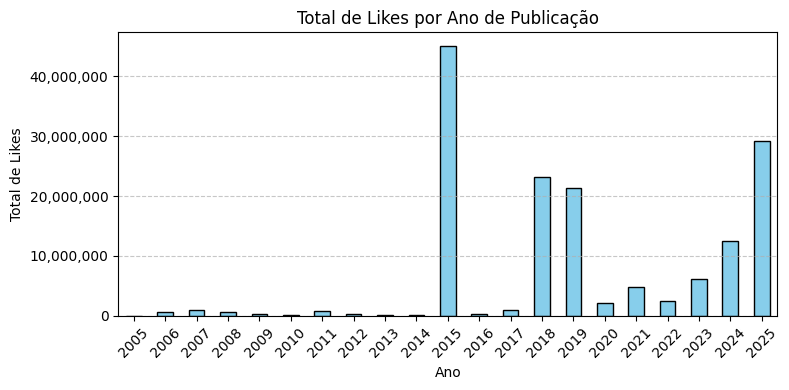

In [1951]:
# PARTE 1
likes_por_ano = df.groupby('published')['Likes'].sum()

# PARTE 2
plt.figure(figsize=(8, 4))
likes_por_ano.plot(kind='bar', color='skyblue', edgecolor='black')

# PARTE 3
plt.title('Total de Likes por Ano de Publicação')
plt.ylabel('Total de Likes')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{int(x):,}')
)

# PARTE 4
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Gráfico de Linha**
* **Insight:** O gráfico mostra picos de visualizações notáveis e atípicos em 2015 e 2019, que se destacam acentuadamente do padrão geral. Embora 2023 apresente visualizações maiores que a maioria dos anos pré-2015, isso pode ser atribuído a um aumento geral no acesso e número de usuários à plataforma ao longo do tempo.
* **Explicação:** O gráfico apresenta a quantidade total de "Visualizações" anualmente, exibindo a evolução desse volume ao longo dos anos.
* **Código:**
* **Parte 1:** Agrupamos pelo ano de publicação somando os valores da coluna Video views para cada ano.
* **Parte 2:** Configuramos o tamanho de exibição do gráfico e a seguir plota um gráfico de barra.
* **Parte 3:** Define o título e os rótulos do eixo X e Y.
* **Parte 4:** Para uma melhor visualização formatamos cada eixo para vir com valores inteiros e com uma interpretação melhor.
* **Parte 5:** Ajusta e exibe o gráfico.

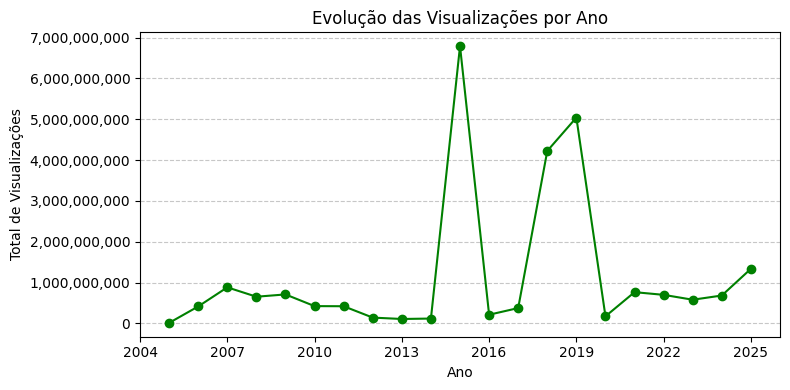

In [1952]:
# PARTE 1
visualizacoes_por_ano = df.groupby('published')['Video views'].sum()

# PARTE 2
plt.figure(figsize=(8, 4))
visualizacoes_por_ano.plot(kind='line', marker='o', color='green')

# PARTE 3
plt.title('Evolução das Visualizações por Ano')
plt.ylabel('Total de Visualizações')
plt.xlabel('Ano')

# PARTE 4
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True)) # Garante valores inteiros
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# PARTE 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Gráfico de Distribuição**
* **Insight:** A distribuição logarítmica dos likes é **bimodal**, apresentando dois picos distintos: um pico principal mais elevado concentrado aproximadamente entre Log10 de 3 e 4.5, e outro, muito menor, localizado por volta de 1 a 1.5.
* **Explicação:** O gráfico apresenta a curva de densidade da distribuição logarítmica (base 10) dos "Likes".
* **Parte 1:** Usa a função log10() do NumPy para aplicar a logarítmica de base 10 na coluna "Likes". (útil em valores muito variados de por exemplo 1 a 1 Milhão).
* **Extra:** Log10 (Logaritmo na base 10) significa que estamos usando a base 10 e multiplicado por x. Exemplo Vídeo com 10 likes = log10 = 1 vídeo com 1.000 likes log10 = 3.
* **Parte 2:** Define o tamanho do gráfico e plota uma curva de densidade (Kernel Density Estimation)
* **Parte 3:** Define o título e os rótulos do eixo X e Y.
* **Parte 4:** Ajusta e exibe o gráfico.

C:\Users\ryand\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


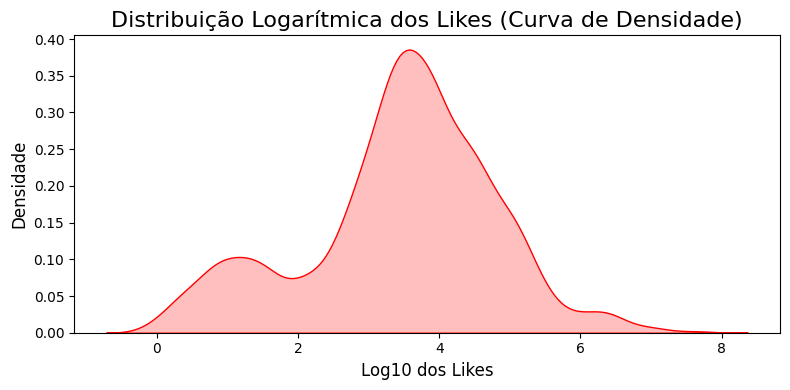

In [1953]:
# PARTE 1
likes_log = np.log10(df['Likes'])

# PARTE 2
plt.figure(figsize=(8, 4))
sns.kdeplot(likes_log, color='red', fill=True, bw_adjust=0.7)

# PARTE 3
plt.title('Distribuição Logarítmica dos Likes (Curva de Densidade)', fontsize=16)
plt.xlabel('Log10 dos Likes', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

# PARTE 4
plt.tight_layout()
plt.show()

**Gráfico de dispersão**
* **Insight:** A maior parte do conteúdo acumula poucos likes independentemente das visualizações, mas há exceções notáveis onde um volume massivo de visualizações se correlaciona com um número muito alto de likes, indicando potencial viral.
* **Explicação:** O gráfico representa a relação entre duas variáveis: "Visualizações" (no eixo X) e "Likes" (no eixo Y). Mostrando o valor total.
* **Código:**
* **Parte 1:** Define a função "formatarvalor", será usado para converter valores numéricos em formatos abreviados, por exemplo 1.000.000.000(Bilhão) em 1.0B
* **Parte 2:** Define o tamanho e cria o gráfico de dispersão os eixos X ("Video views") e eixo Y ("Likes").
* **Parte 3:** Define o título e os rótulos dos eixos X e Y.
* **Parte 4:** Usando a função da **Parte 1** formata os dados para uma exibição simplificada.
* **Parte 5:** Ajusta e exibe o gráfico.

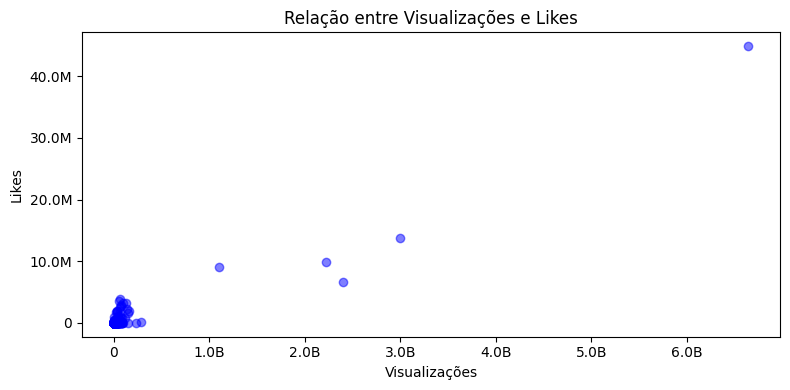

In [1954]:
# PARTE 1
def formatarvalor(valor, pos):
    if valor >= 1_000_000_000:
        return f'{valor/1_000_000_000:.1f}B'
    elif valor >= 1_000_000:
        return f'{valor/1_000_000:.1f}M'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f}K'
    else:
        return int(valor)

# PARTE 2
plt.figure(figsize=(8, 4))
plt.scatter(df['Video views'], df['Likes'], alpha=0.5, color='blue')

# PARTE 3
plt.title('Relação entre Visualizações e Likes')
plt.xlabel('Visualizações')
plt.ylabel('Likes')

# PARTE 4
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(formatarvalor))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(formatarvalor))

# PARTE 5
plt.tight_layout()
plt.show()

**Mapa de Correlação**
* **Insight:** Há uma forte correlação positiva entre visualizações e likes, enquanto dislikes e o ano de publicação têm pouca ou nenhuma correlação com as outras métricas.
* **Explicação:** É uma representação visual das relações estatísticas (correlações) entre pares de variáveis. Os valores variam de -1 a 1, onde 1 indica uma correlação positiva, -1 indica uma correlação negativa e 0 indica nenhuma correlação.
* **Parte 1:** Seleciona as colunas mencionadas e calcula a matriz de correlação. (É importante as colunas ser numéricas)
* **Parte 2:** Cria o mapa, mostra os valores numéricos da correlação dentro das células, usa um esquema de cores saindo do azul(valores negativos) ao vermelho(valores positivos) e finaliza formatando os números com até duas casas decimais.
* **Parte 3:** Cria um título, ajusta e exibe o mapa.

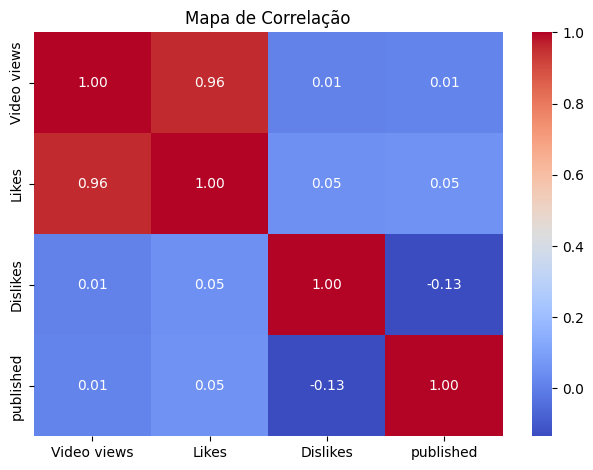

In [1955]:
# PARTE 1
correlacao = df[['Video views', 'Likes', 'Dislikes', 'published']].corr()

# PARTE 2
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")

# PARTE 3
plt.title('Mapa de Correlação')
plt.tight_layout()
plt.show()

Nosso dataframe apresentou limitações que impediram o uso adequado de certos tipos de gráficos. Por motivos técnicos e de visualização, optamos por não utilizar os gráficos de **Pizza, Boxplot e Histograma.**

**Razões:**
Houve uma grande variação nos valores numéricos, indo de números com 1 dígito até valores com 10 dígitos. Essa amplitude dificultou a geração de gráficos visualmente compreensíveis e úteis. Como resultado, esses tipos de gráficos não foram utilizados na análise.

## 2.4. Correlação, Causalidade e Correlação Espúria

**Correlação Estatíca:**
* Existe uma correlação positiva entre as colunas "Video views" e "Likes".
* **Justificativa:** Vídeos com mais visualizações tendem a apresentar um número maior de curtidas. Ao observar o mapa de correlação, nota-se um valor próximo de 1, indicando uma relação forte entre essas variáveis.

**Possível Relação Causal:**
* Relação sugerida: Mais visualizações causam mais curtidas.
* **Justificativa:** Quando um vídeo tem mais visualizações, ele está sendo exposta a um número maior de usuários. como o botão **"curtir"** está diretamente relacionado à experiência de quem assitiu, é natural que mais pessoas curtam.

**Correlação Espúria**
* Encontra-se uma correlação positiva entre o ano de publicação e visualizações.
* **Justificativa:** Vídeos mais antigos podem ter mais visualizações do que os mais novos apenas por estarem há mais tempo disponíveis. Ou o contrário pode ocorrer se os vídeos mais recentes forem mais populares por causa do crescimento da plataforma.

## 2.5. O que aprendemos?

**O que entendemos sobre isso?**
* 2015 foi um ano-chave no crescimento da plataforma.
Música dominando em visualizações e curtidas, popularidade não significa aceitação unânime, engajamento proporcional revela vídeos com fãs fiéis, mesmo com o menor alcance. E criar métricas personalizadas ajuda a enxergar além dos números absolutos.

**Conclusão:**
* Aprendemos que o sucesso do YouTube é influenciado por fatores como tipo de conteúdo, ano de publicação e o engajamento real do público. Análises bem planejadas permitiram extrair *insights* que vão além da superfície e revela o verdadeiro impacto dos vídeos analizados.

# 3. Código extra, apenas testes.

É realizado 3 códigos e impresso na tela logo a seguir.
* Primeiro é criado uma variável para cada linha.
* É calculado o total de visualizações.
* É buscado o maior e menor vídeo com base nas visualizações

In [1956]:
total_views = df['Video views'].sum()
maximo_views = df['Video views'].max()
minimo_views = df['Video views'].min()

In [1957]:
print('Total de visualizações foi: ', total_views)
print('Vídeo com mais visualizações teve: ', maximo_views)
print('Vídeo com menos visualizações teve: ', minimo_views)

Total de visualizações foi:  24747018694
Vídeo com mais visualizações teve:  6643904918
Vídeo com menos visualizações teve:  56578


A seguir criamos mais 3 códigos onde será tratados os 10 maiores.
* É buscado os 10 maiores vídeos com views
* 10 maiores vídeos com likes
* 10 maiores vídeos com dislikes

In [1958]:
top10Views = df.sort_values(by='Video views', ascending=False).head(10)
top10Likes = df.sort_values(by='Likes', ascending=False).head(10)
top10Dislikes = df.sort_values(by='Dislikes', ascending=False).head(10)

Top 10 maiores vídeos com base nas Views

In [1959]:
top10Views

,rank,Video,Video views,Likes,Dislikes,Category,published,Likes per 100 views
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,6643904918,44861602,0,Music,2015,1
40,41,"Pedro Capó, Farruko - Calma (Remix - Official ...",2993030499,13840531,0,Music,2018,0
321,322,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",2399769757,6684120,0,Music,2019,0
125,126,"ROSALÍA, J Balvin - Con Altura (Official Video...",2224022798,9802981,0,Music,2019,0
29,30,"6ix9ine - FEFE ft. Nicki Minaj, Murda Beatz",1097393695,9038575,0,People & Blogs,2018,1
465,466,BallsCrash,280745872,64224,21652,Comedy,2009,0
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,236085971,38,0,Sem categoria,2021,0
371,372,Rocket Blast Off #messingaround #flying #fun #...,156690686,1868300,0,Sports,2024,1
90,91,Barack Obama Hillary Clinton - Umbrella,148996976,36190,20698,Comedy,2008,0
538,539,A kind-hearted elderly person rescued an injur...,146925966,1616667,0,People & Blogs,2025,1


Top 10 maiores vídeos com base nos Likes

In [1960]:
top10Likes

,rank,Video,Video views,Likes,Dislikes,Category,published,Likes per 100 views
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,6643904918,44861602,0,Music,2015,1
40,41,"Pedro Capó, Farruko - Calma (Remix - Official ...",2993030499,13840531,0,Music,2018,0
125,126,"ROSALÍA, J Balvin - Con Altura (Official Video...",2224022798,9802981,0,Music,2019,0
29,30,"6ix9ine - FEFE ft. Nicki Minaj, Murda Beatz",1097393695,9038575,0,People & Blogs,2018,1
321,322,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",2399769757,6684120,0,Music,2019,0
94,95,Olivia Rodrigo - drivers license (Official Video),68224979,3810456,48539,Music,2021,6
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,54071677,3497955,78799,Music,2019,6
369,370,😭,101094612,3259676,0,Entertainment,2025,3
539,540,Drawing the pillar of life🥶🗿#trollface #trollf...,133062446,3173002,0,People & Blogs,2025,2
846,847,Insta Vs Reality 😲😍 #travel #unrealplaces #exp...,73165517,2967591,0,Travel & Events,2024,4


Top 10 maiores vídeos com base nos Dislikes

In [1961]:
top10Dislikes

,rank,Video,Video views,Likes,Dislikes,Category,published,Likes per 100 views
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,54071677,3497955,78799,Music,2019,6
94,95,Olivia Rodrigo - drivers license (Official Video),68224979,3810456,48539,Music,2021,6
31,32,"Biggest Snake of the World for Sale, 25 000 €",55113253,3957,46705,Entertainment,2008,0
56,57,Why athletes should wear pants,17802747,2935,46151,Sports,2008,0
447,448,RickRoll'D,78178105,318037,44953,Music,2007,0
946,947,Brave Kitten Stands Up to Dog,45622964,98565,38062,Entertainment,2011,0
43,44,JD Pantoja - 12•19 (Official Video),7010732,1027392,34185,Music,2020,15
972,973,Выборы 2018. Шокирующий фильм Никиты Михалкова...,2056243,5762,28321,Nonprofits & Activism,2017,0
226,227,If you watch this 100 times you'll still laugh !,45597951,97649,27835,Comedy,2008,0
465,466,BallsCrash,280745872,64224,21652,Comedy,2009,0


In [1962]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 994 non-null    int64  
 1   Video                994 non-null    object 
 2   Video views          994 non-null    int64  
 3   Likes                994 non-null    int64  
 4   Dislikes             994 non-null    int64  
 5   Category             994 non-null    object 
 6   published            994 non-null    int64  
 7   Likes per 100 views  994 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 102.2+ KB


In [1963]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder

In [1964]:
y = df['Category']
x = df[['Video views', 'Likes', 'Dislikes']]

In [1965]:
le = LabelEncoder()
y = le.fit_transform(y)

In [1966]:
x_train, x_teste, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1967]:
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

C:\Users\ryand\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [1968]:
y_pred = model.predict(x_teste)

In [1969]:
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.4120603015075377
